In [5]:
import matplotlib.pyplot as plt
import numpy as np

性别比例变化:

初始性别比例基于指定的变化（平等、雄性优势或雌性优势）进行设定。
繁殖成功:

reproductive_success[gen] = reproductive_success[gen - 1] - 0.005 * abs(gender_ratio[gen] - 0.5)
随着性别比例偏离50:50，繁殖成功逐渐减小。
捕食者数量:

predator_population[gen] = predator_population[gen - 1] * reproductive_success[gen]
捕食者数量取决于繁殖成功的影响。
食物资源:

food_resources[gen] = food_resources[gen - 1] - 0.02
食物资源线性减少。
寄生虫数量:

parasite_population[gen] = parasite_population[gen - 1] + np.random.normal(loc=0, scale=0.1)
寄生虫数量随机增加。
综合指标:

composite_indicator[gen] = 0.3 * gender_ratio[gen] + 0.4 * predator_population[gen] + 0.2 * reproductive_success[gen] + 0.1 * food_resources[gen]
综合指标是性别比例、捕食者数量、繁殖成功和食物资源的加权和。可以根据其重要性调整权重。
平滑综合指标:

composite_indicator_smooth = np.convolve(composite_indicator, np.ones(5)/5, mode='valid')
使用窗口大小为5的移动平均平滑综合指标。

In [6]:
# 一个用法
def simulate_ecosystem(gender_ratio_variation):
    # 模拟七鳃鳗雄性比例的变化
    if gender_ratio_variation == 'equal':
        initial_ratio = 0.5  # 初始雄性比例为 50%
    elif gender_ratio_variation == 'male_dominant':
        initial_ratio = 0.8  # 初始雄性比例为 70%
    elif gender_ratio_variation == 'female_dominant':
        initial_ratio = 0.2  # 初始雄性比例为 30%
    else:
        raise ValueError("Invalid gender ratio variation")

    generations = 50
    gender_ratio = np.zeros(generations)
    gender_ratio[0] = initial_ratio
    
    predator_population = np.ones(generations)  # 初始捕食者数量为1
    reproductive_success = np.ones(generations)  # 初始繁殖成功率为 1
    food_resources = np.ones(generations)  # 初始食物资源为 1
    parasite_population = np.ones(generations)  # 初始寄生虫数量为 1
    composite_indicator = np.zeros(generations)  # 初始综合指标为0

    for gen in range(1, generations):
        # 模拟雄性比例的变化
        # 雄性比例向50%回归
        gender_ratio[gen] = gender_ratio[gen - 1]
        # 模拟繁殖成功率的变化
        reproductive_success[gen] = reproductive_success[gen - 1] - 0.005 * abs(gender_ratio[gen] - 0.5)
        # 模拟捕食者数量的变化
        predator_population[gen] = predator_population[gen - 1] * reproductive_success[gen] 
        # 模拟食物资源的变化
        food_resources[gen] = food_resources[gen - 1] - 0.02
        # 模拟寄生虫数量的变化
        parasite_population[gen] = parasite_population[gen - 1] + np.random.normal(loc=0, scale=0.1)
        # 计算综合指标(加权求和)，增加对性的权重
        # 这里简单地加权求和，你可以根据实际情况调整权重
        composite_indicator[gen] = 0.3 * gender_ratio[gen] + 0.4 * predator_population[gen] + 0.2 * reproductive_success[gen] + 0.1 * food_resources[gen]
    # 使用正态分布生成平滑曲线
    composite_indicator_smooth = np.convolve(composite_indicator, np.ones(5)/5, mode='valid')
    return composite_indicator_smooth


In [7]:
# 模拟性别比例为1:1的情况
equal_gender_ratio_indicator = simulate_ecosystem('equal')
# 模拟性别比例为90%雄性的情况
male_dominant_indicator = simulate_ecosystem('male_dominant')
# 模拟性别比例为10%雄性的情况
female_dominant_indicator = simulate_ecosystem('female_dominant')


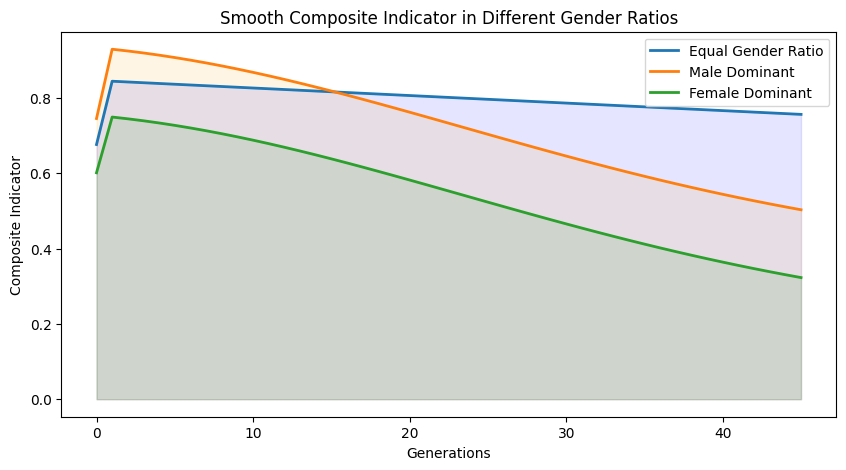

In [8]:
# 绘制结果
generations = np.arange(len(equal_gender_ratio_indicator))
plt.figure(figsize=(10, 5))
# 综合指标图
plt.plot(generations, equal_gender_ratio_indicator, label='Equal Gender Ratio', linewidth=2)
plt.plot(generations, male_dominant_indicator, label='Male Dominant', linewidth=2)
plt.plot(generations, female_dominant_indicator, label='Female Dominant', linewidth=2)

# 添加阴影
plt.fill_between(generations, equal_gender_ratio_indicator, alpha=0.1, color='blue')
plt.fill_between(generations, male_dominant_indicator, alpha=0.1, color='orange')
plt.fill_between(generations, female_dominant_indicator, alpha=0.1, color='green')

plt.title('Smooth Composite Indicator in Different Gender Ratios')
plt.xlabel('Generations')
plt.ylabel('Composite Indicator')
plt.legend()

plt.show()
